In [1]:
import numpy as np
import pandas as pd

In [2]:
"""
Задача - определение пола абонента на основании банковских транзакционных данных . 
 
Для каждого клиента банка из файла test_set.csv проставьте предиктив пола абонента по следующему примеру:  
 
client_id;gender_prediction 
61240380;1
34114030;0 
61240380;0
34114031;1 
 
Файлы: 
types.csv  - справочник типов транзакций 
codes.csv - справочник кодов транзакций 
transactions.csv - транзакционные данные по банковским операциям  
train_set.csv - тренировочный сет с разметкой пола абонента(0/1  - пол абонента) 
test_set.csv - тестовый сет, который необходимо разметить 
 
 
Описание полей для файла transactions.csv: 
 
client_id - id клиента банка 
datetime - дата транзакции(формат - порядковый_номер_дня час:минута:секунда.пример - 421 06:33:15) 
code - номер кода транзакции 
type - номер типа транзакции 
sum - сумма транзакции
"""
print('')

### I. Explore the dataset. 
Do the descriptive statistics. 

In [3]:
codes = pd.read_csv('codes.csv', sep = ';')
print(codes.shape)
print(codes.describe(include=['object']))
codes.head(2)

(184, 2)
                                         code_description
count                                                 184
unique                                                184
top     Магазины по продаже часов, ювелирных изделий и...
freq                                                    1


,code,code_description
0,5944,"Магазины по продаже часов, ювелирных изделий и..."
1,5621,Готовые сумочные изделия


In [4]:
test_set = pd.read_csv('test_set.csv')
print(test_set.shape)
test_set.head(2)

(2656, 1)


,client_id
0,61240380
1,34114030


In [5]:
train_set = pd.read_csv('train_set.csv', sep = ';')
print(train_set.shape)
train_set.head(2)

(6000, 2)


,client_id,target
0,75063019,0
1,86227647,1


In [6]:
transactions = pd.read_csv('transactions.csv', sep = ';')
print(transactions.shape)
transactions.head(2)

(130039, 5)


,client_id,datetime,code,type,sum
0,96372458,421 06:33:15,6011,2010,-561478.94
1,24567813,377 17:20:40,6011,7010,67377.47


In [7]:
types = pd.read_csv('types.csv', sep = ';')
print(types.shape)
print(types.describe(include=['object']))
types.head(2)

(155, 2)
       type_description
count               155
unique              139
top                 н/д
freq                 13


,type,type_description
0,8001,Установление расх. лимита по карте
1,2411,Перевод с карты на счет др.лица в одном тер. б...


### III. Feature engineering. 
Encodings, generating the features from date-time, sum and
from other columns. (https://www.kaggle.com/learn/feature-engineering, https://
www.kaggle.com/learn/data-cleaning )

In [8]:
"""Separated the numbers from the datatime for decryption"""
transactions['num'] = transactions.datetime.str.split(' ').str.get(0).astype('int')
transactions['time'] = transactions.datetime.str.split(' ').str.get(1)

In [9]:
transactions.dtypes

client_id      int64
datetime      object
code           int64
type           int64
sum          float64
num            int32
time          object
dtype: object

In [10]:
"""Getting a date range of 457 days"""
import datetime as DT
import pandas as pd

start_date = DT.datetime(2014, 8, 14)
end_date = DT.datetime(2015, 11, 13)

res = pd.date_range(
    min(start_date, end_date),
    max(start_date, end_date)
).strftime('%d/%m/%Y').tolist()
print(len(res))

print(res[:10])

457
['14/08/2014', '15/08/2014', '16/08/2014', '17/08/2014', '18/08/2014', '19/08/2014', '20/08/2014', '21/08/2014', '22/08/2014', '23/08/2014']


In [11]:
"""Decoding numbers by applying the date range created by us(res)"""
sort_date = pd.DataFrame(res, np.arange(0,457)).reset_index()

df = sort_date.rename(columns={"index":"num", 0:"date"})
df

,num,date
0,0,14/08/2014
1,1,15/08/2014
2,2,16/08/2014
3,3,17/08/2014
4,4,18/08/2014
...,...,...
452,452,09/11/2015
453,453,10/11/2015
454,454,11/11/2015
455,455,12/11/2015


In [12]:
"""Added an estimated date"""
transactions  = pd.merge(transactions, df, on = 'num')
transactions

,client_id,datetime,code,type,sum,num,time,date
0,96372458,421 06:33:15,6011,2010,-561478.94,421,06:33:15,09/10/2015
1,10004871,421 18:39:01,6010,7070,1661.98,421,18:39:01,09/10/2015
2,19864270,421 13:54:50,4814,1030,-5614.79,421,13:54:50,09/10/2015
3,1394168,421 04:04:44,5499,1010,-1796.73,421,04:04:44,09/10/2015
4,14866430,421 05:29:46,5411,1110,-1257.71,421,05:29:46,09/10/2015
...,...,...,...,...,...,...,...,...
130034,70519205,30 21:02:50,4814,1030,-1122.96,30,21:02:50,13/09/2014
130035,91248192,30 10:57:22,4814,1030,-2245.92,30,10:57:22,13/09/2014
130036,14123285,30 16:32:51,6011,2010,-13475.49,30,16:32:51,13/09/2014
130037,36444703,30 00:26:29,5331,1010,-6120.57,30,00:26:29,13/09/2014


In [13]:
"""Changed the datetime column with decoding"""
transactions['datetime'] = pd.to_datetime(transactions['date'] + transactions['time'], format='%d/%m/%Y%H:%M:%S')
transactions

,client_id,datetime,code,type,sum,num,time,date
0,96372458,2015-10-09 06:33:15,6011,2010,-561478.94,421,06:33:15,09/10/2015
1,10004871,2015-10-09 18:39:01,6010,7070,1661.98,421,18:39:01,09/10/2015
2,19864270,2015-10-09 13:54:50,4814,1030,-5614.79,421,13:54:50,09/10/2015
3,1394168,2015-10-09 04:04:44,5499,1010,-1796.73,421,04:04:44,09/10/2015
4,14866430,2015-10-09 05:29:46,5411,1110,-1257.71,421,05:29:46,09/10/2015
...,...,...,...,...,...,...,...,...
130034,70519205,2014-09-13 21:02:50,4814,1030,-1122.96,30,21:02:50,13/09/2014
130035,91248192,2014-09-13 10:57:22,4814,1030,-2245.92,30,10:57:22,13/09/2014
130036,14123285,2014-09-13 16:32:51,6011,2010,-13475.49,30,16:32:51,13/09/2014
130037,36444703,2014-09-13 00:26:29,5331,1010,-6120.57,30,00:26:29,13/09/2014


In [14]:
"""We noted that some clients is not predicted in the transaction table"""
transactions['is_exists_in_train'] = transactions.client_id.isin(train_set.client_id).astype('str')
transactions

,client_id,datetime,code,type,sum,num,time,date,is_exists_in_train
0,96372458,2015-10-09 06:33:15,6011,2010,-561478.94,421,06:33:15,09/10/2015,True
1,10004871,2015-10-09 18:39:01,6010,7070,1661.98,421,18:39:01,09/10/2015,False
2,19864270,2015-10-09 13:54:50,4814,1030,-5614.79,421,13:54:50,09/10/2015,True
3,1394168,2015-10-09 04:04:44,5499,1010,-1796.73,421,04:04:44,09/10/2015,False
4,14866430,2015-10-09 05:29:46,5411,1110,-1257.71,421,05:29:46,09/10/2015,False
...,...,...,...,...,...,...,...,...,...
130034,70519205,2014-09-13 21:02:50,4814,1030,-1122.96,30,21:02:50,13/09/2014,True
130035,91248192,2014-09-13 10:57:22,4814,1030,-2245.92,30,10:57:22,13/09/2014,False
130036,14123285,2014-09-13 16:32:51,6011,2010,-13475.49,30,16:32:51,13/09/2014,False
130037,36444703,2014-09-13 00:26:29,5331,1010,-6120.57,30,00:26:29,13/09/2014,True


In [15]:
transactions = pd.merge(transactions, train_set, on = 'client_id')
transactions

,client_id,datetime,code,type,sum,num,time,date,is_exists_in_train,target
0,96372458,2015-10-09 06:33:15,6011,2010,-561478.94,421,06:33:15,09/10/2015,True,0
1,96372458,2015-05-11 06:16:18,6011,7010,224591.58,270,06:16:18,11/05/2015,True,0
2,96372458,2014-12-21 05:34:06,6010,7030,224591.58,129,05:34:06,21/12/2014,True,0
3,96372458,2015-10-21 06:45:32,6011,2010,-112295.79,433,06:45:32,21/10/2015,True,0
4,96372458,2015-06-05 08:16:07,4814,1030,-11229.58,295,08:16:07,05/06/2015,True,0
...,...,...,...,...,...,...,...,...,...,...
91821,52382187,2015-02-27 12:33:28,6011,2010,-224591.58,197,12:33:28,27/02/2015,True,0
91822,5188784,2015-02-27 15:59:35,6011,2010,-269509.89,197,15:59:35,27/02/2015,True,1
91823,1925153,2015-02-27 12:26:21,6011,2010,-561478.94,197,12:26:21,27/02/2015,True,1
91824,65393099,2015-07-31 19:57:03,5921,1010,-4715.75,351,19:57:03,31/07/2015,True,0


In [16]:
"""Females"""
fem_data = transactions[transactions.target == 0]
fem_data

,client_id,datetime,code,type,sum,num,time,date,is_exists_in_train,target
0,96372458,2015-10-09 06:33:15,6011,2010,-561478.94,421,06:33:15,09/10/2015,True,0
1,96372458,2015-05-11 06:16:18,6011,7010,224591.58,270,06:16:18,11/05/2015,True,0
2,96372458,2014-12-21 05:34:06,6010,7030,224591.58,129,05:34:06,21/12/2014,True,0
3,96372458,2015-10-21 06:45:32,6011,2010,-112295.79,433,06:45:32,21/10/2015,True,0
4,96372458,2015-06-05 08:16:07,4814,1030,-11229.58,295,08:16:07,05/06/2015,True,0
...,...,...,...,...,...,...,...,...,...,...
91818,44130839,2014-09-27 11:28:18,6011,2010,-179673.26,44,11:28:18,27/09/2014,True,0
91819,43147536,2014-10-26 13:52:42,6010,7070,1122957.89,73,13:52:42,26/10/2014,True,0
91821,52382187,2015-02-27 12:33:28,6011,2010,-224591.58,197,12:33:28,27/02/2015,True,0
91824,65393099,2015-07-31 19:57:03,5921,1010,-4715.75,351,19:57:03,31/07/2015,True,0


In [17]:
"""Males"""
male_data = transactions[transactions.target == 1]
male_data

,client_id,datetime,code,type,sum,num,time,date,is_exists_in_train,target
13,19864270,2015-10-09 13:54:50,4814,1030,-5614.79,421,13:54:50,09/10/2015,True,1
14,19864270,2015-03-24 08:41:58,5411,1010,-14680.88,222,08:41:58,24/03/2015,True,1
15,19864270,2015-01-31 08:05:10,5499,1010,-4905.08,170,08:05:10,31/01/2015,True,1
16,19864270,2014-11-30 00:00:00,5411,1110,-17048.30,108,00:00:00,30/11/2014,True,1
17,19864270,2014-09-02 11:38:02,4814,1030,-5614.79,19,11:38:02,02/09/2014,True,1
...,...,...,...,...,...,...,...,...,...,...
91811,95055476,2014-12-16 15:04:26,4814,1030,-2245.92,124,15:04:26,16/12/2014,True,1
91817,30699304,2014-10-05 20:33:29,6010,7030,22459.16,52,20:33:29,05/10/2014,True,1
91820,18360110,2015-06-21 07:54:45,4814,1030,-2245.92,311,07:54:45,21/06/2015,True,1
91822,5188784,2015-02-27 15:59:35,6011,2010,-269509.89,197,15:59:35,27/02/2015,True,1


In [18]:
"""Tables grouped by income and loss of sum for each gender"""
positive_sum_fem = fem_data[fem_data['sum']>0]
negative_sum_fem = fem_data[fem_data['sum']<0]
positive_sum_male = male_data[male_data['sum']<0]
negative_sum_male = male_data[male_data['sum']<0]

In [19]:
"""Female make transactions more often these times"""
fem_data.time.value_counts().head(10)

00:00:00    4759
11:55:56       6
15:44:07       6
17:54:08       6
13:18:37       6
15:22:16       6
10:45:52       6
16:44:52       6
18:29:40       6
10:18:37       6
Name: time, dtype: int64

In [20]:
"""Male make transactions more often these times"""
male_data.time.value_counts().head(10)

00:00:00    5910
14:44:47       7
13:50:37       6
12:01:13       6
10:34:09       6
14:16:40       6
16:23:34       5
10:22:57       5
16:36:52       5
18:10:07       5
Name: time, dtype: int64

In [21]:
"""Top 10 codes of female"""
fem_data.code.value_counts().head(10)

6011    9916
4814    7429
5411    6801
6010    6736
4829    4403
5499    2277
5912    1112
5331     902
5812     596
5814     493
Name: code, dtype: int64

In [22]:
"""Top 10 codes of male"""
male_data.code.value_counts().head(10)

6011    9622
6010    7357
5411    6202
4814    5615
4829    3731
5499    2179
5541    1357
5812     852
5331     785
5912     750
Name: code, dtype: int64

In [23]:
"""The sorted types dataframe shows a sequence of similar types that we can do clasterization"""
types.sort_values('type_description').head(10)

,type,type_description
41,999999,XXX
73,2901,Безналичное списание денежных средств со счета...
151,2320,Безналичный перевод денежных средств через POS
75,7020,Взнос наличных через POS
121,7021,Взнос наличных через POS
80,7025,Взнос наличных через POS (в других ТБ) по счет...
144,7024,Взнос наличных через POS (в своем ТБ) по счету...
69,7011,Взнос наличных через АТМ
90,7015,Взнос наличных через АТМ (в других ТБ) по счет...
62,7014,Взнос наличных через АТМ (в своем ТБ) по счету...


In [24]:
"""Deleting unnecessary values from types df"""
types.drop_duplicates(subset='type_description', inplace = True)
types = types[(types.type != 999999) & (types.type_description != 'н/д(нет данных)') & (types.type_description != 'н/д')]
types.shape

(136, 2)

In [25]:
"""By this hand maded key words we can claster them into 14 groups"""
type_key_words = [
'Взнос',
'Возврат',
'Выдача',
'Зачисление Комиссия Корректировка Операции Поправки Увеличение Урегулирование Установление Безналичное Безналичный' ,
'Межфилиальные',
'Наличные',
'Оплата',
'Перевод',
'Плата',
'Платеж',
'Погашение',
'Покупка',
'Пополнение',
'Списание']

In [26]:
types['type_cluster'] ='null'

In [27]:
"""The loops for doing the clusterization"""
for k in range(14):
    for i in range(136):
        for j in types['type_description'].iloc[i].replace('.', '').replace('/', ' ').split(' '):
            for c in type_key_words[k].split(' '):
                if j == c:
                    types['type_cluster'].iloc[i] = k

C:\Anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [28]:
types.dtypes

type                 int64
type_description    object
type_cluster        object
dtype: object

In [29]:
types['type_cluster'] = types['type_cluster'].astype('int')

In [30]:
"""The clusterization of types is DONE"""
types.sort_values('type_cluster')

,type,type_description,type_cluster
90,7015,Взнос наличных через АТМ (в других ТБ) по счет...,0
69,7011,Взнос наличных через АТМ,0
75,7020,Взнос наличных через POS,0
62,7014,Взнос наличных через АТМ (в своем ТБ) по счету...,0
20,7010,Взнос наличных через АТМ (в своем тер.банке),0
...,...,...,...
45,2330,Списание с карты по операции “перевода с карты...,13
44,2370,Списание с карты на карту по операции <перевод...,13
106,2342,Списание с карты по операции “перевода с карты...,13
139,8003,Списание подоходного налога с нерезидента,13


In [31]:
"""Clusterization the transaction df"""
transactions['sum_clusters'] = 'null'

In [32]:
"""Grouping into loss and profit"""
for i in range(91826 ):
    if transactions['sum'].iloc[i] > 0:
        transactions['sum_clusters'].iloc[i] = 1
    else:
        transactions['sum_clusters'].iloc[i] = 0

C:\Anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [33]:
transactions.head()

,client_id,datetime,code,type,sum,num,time,date,is_exists_in_train,target,sum_clusters
0,96372458,2015-10-09 06:33:15,6011,2010,-561478.94,421,06:33:15,09/10/2015,True,0,0
1,96372458,2015-05-11 06:16:18,6011,7010,224591.58,270,06:16:18,11/05/2015,True,0,1
2,96372458,2014-12-21 05:34:06,6010,7030,224591.58,129,05:34:06,21/12/2014,True,0,1
3,96372458,2015-10-21 06:45:32,6011,2010,-112295.79,433,06:45:32,21/10/2015,True,0,0
4,96372458,2015-06-05 08:16:07,4814,1030,-11229.58,295,08:16:07,05/06/2015,True,0,0


In [34]:
transactions = pd.merge(transactions, types, on = 'type')
del transactions['type_description']

In [35]:
transactions

,client_id,datetime,code,type,sum,num,time,date,is_exists_in_train,target,sum_clusters,type_cluster
0,96372458,2015-10-09 06:33:15,6011,2010,-561478.94,421,06:33:15,09/10/2015,True,0,0,2
1,96372458,2015-10-21 06:45:32,6011,2010,-112295.79,433,06:45:32,21/10/2015,True,0,0,2
2,96372458,2014-10-21 02:04:11,6011,2010,-426724.00,68,02:04:11,21/10/2014,True,0,0,2
3,19864270,2015-10-03 06:06:21,6011,2010,-11229.58,415,06:06:21,03/10/2015,True,1,0,2
4,70883403,2015-07-20 10:32:55,6011,2010,-67377.47,340,10:32:55,20/07/2015,True,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...
68696,48214869,2014-08-23 00:00:00,7399,8100,7389.06,9,00:00:00,23/08/2014,True,0,1,13
68697,72343780,2015-09-20 17:32:46,6010,7041,613135.01,402,17:32:46,20/09/2015,True,0,1,7
68698,78085289,2015-04-28 07:30:57,6010,7024,786070.52,257,07:30:57,28/04/2015,True,1,1,0
68699,50489467,2014-12-21 18:53:38,6010,7024,449183.15,129,18:53:38,21/12/2014,True,0,1,0


### II. Explanatory data analysis. 
Exploring the features, visualizations etc. (https://
www.kaggle.com/learn/data-visualization, https://towardsdatascience.com/
exploratory-data-analysis-8fc1cb20fd15, https://www.mastersindatascience.org/
learning/what-is-exploratory-data-analysis/ ) 

<AxesSubplot:ylabel='date,date'>

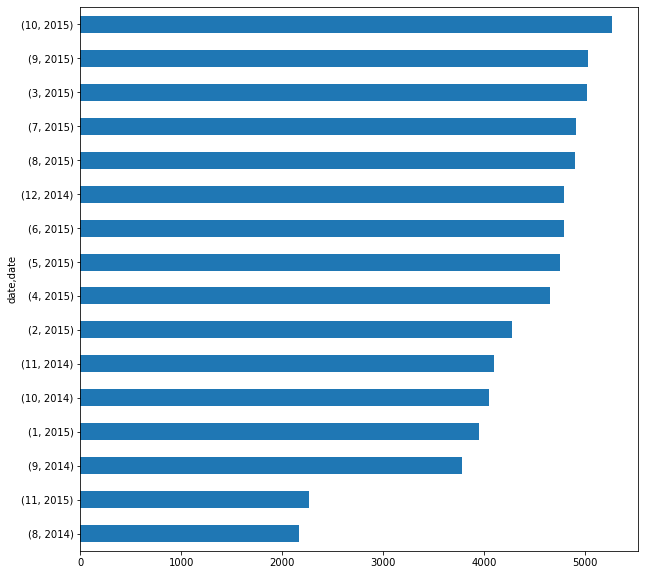

In [82]:
""""""
transactions.index = pd.to_datetime(transactions['date'],format='%d/%m/%Y')
t=transactions.groupby(by=[transactions.index.month, transactions.index.year])["target"].aggregate('count').sort_values()
t.plot(kind='barh', figsize=(10,10))

In [36]:
transactions.head()

,client_id,datetime,code,type,sum,num,time,date,is_exists_in_train,target,sum_clusters,type_cluster
0,96372458,2015-10-09 06:33:15,6011,2010,-561478.94,421,06:33:15,09/10/2015,True,0,0,2
1,96372458,2015-10-21 06:45:32,6011,2010,-112295.79,433,06:45:32,21/10/2015,True,0,0,2
2,96372458,2014-10-21 02:04:11,6011,2010,-426724.00,68,02:04:11,21/10/2014,True,0,0,2
3,19864270,2015-10-03 06:06:21,6011,2010,-11229.58,415,06:06:21,03/10/2015,True,1,0,2
4,70883403,2015-07-20 10:32:55,6011,2010,-67377.47,340,10:32:55,20/07/2015,True,1,0,2


target
0    [[AxesSubplot(0.125,0.670278;0.215278x0.209722...
1    [[AxesSubplot(0.125,0.670278;0.215278x0.209722...
dtype: object

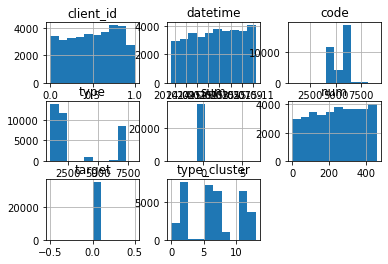

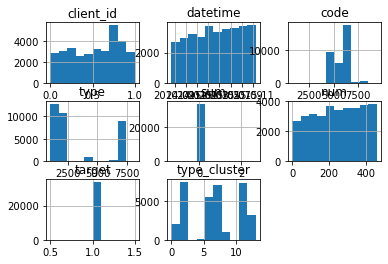

In [37]:
transactions.groupby('target').hist()

target
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
Name: datetime, dtype: object

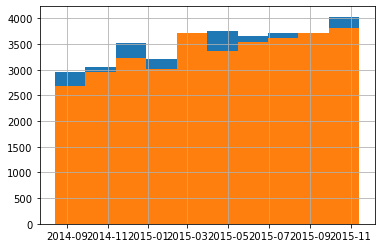

In [38]:
"""Shows that females do more transactions than males"""
transactions.groupby('target').datetime.hist()

In [39]:
transactions.sort_values('sum')

,client_id,datetime,code,type,sum,num,time,date,is_exists_in_train,target,sum_clusters,type_cluster
34752,5546147,2015-07-18 15:33:24,4829,2370,-41500301.14,338,15:33:24,18/07/2015,True,0,0,13
37166,48281795,2015-03-16 10:26:40,4829,2370,-33688736.58,214,10:26:40,16/03/2015,True,0,0,13
41076,66647597,2015-11-11 00:00:00,5691,1110,-13475494.63,454,00:00:00,11/11/2015,True,1,0,11
32969,45894000,2015-10-21 07:57:49,4829,2330,-12352536.75,433,07:57:49,21/10/2015,True,1,0,13
35310,85373071,2015-01-07 07:13:17,4829,2370,-12352536.75,146,07:13:17,07/01/2015,True,1,0,13
...,...,...,...,...,...,...,...,...,...,...,...,...
59532,48281795,2015-03-17 10:36:52,6010,7070,33688736.58,215,10:36:52,17/03/2015,True,0,1,7
59528,48281795,2015-02-25 10:35:18,6010,7070,67377473.16,195,10:35:18,25/02/2015,True,0,1,7
59529,48281795,2015-03-03 15:53:36,6010,7070,67377473.16,201,15:53:36,03/03/2015,True,0,1,7
59536,48281795,2015-02-27 10:53:03,6010,7070,67377473.16,197,10:53:03,27/02/2015,True,0,1,7


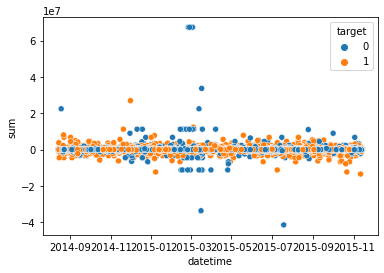

In [40]:
"""Shows that Women spend money more extreme"""
import seaborn as sns
sns.scatterplot(data=transactions, y="sum", x="datetime", hue= 'target');

In [41]:
fem_day_client_id=fem_data[['client_id','date']]
fem_day_client_id.groupby(['date'])['client_id'].aggregate('count').reset_index().sort_values('client_id', ascending=False).head(10)

,date,client_id
155,11/06/2015,160
415,28/09/2015,153
450,31/05/2015,149
207,14/10/2015,149
73,05/11/2015,146
417,28/10/2015,145
58,04/11/2015,144
431,29/10/2015,143
269,18/12/2014,142
21,02/07/2015,142


<AxesSubplot:ylabel='date'>

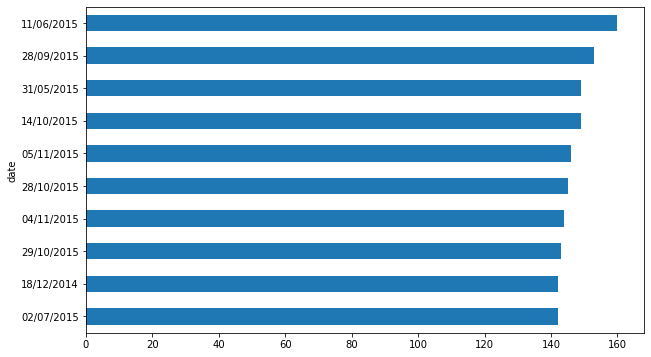

In [42]:
most_day_fem = fem_data.groupby(["date"])["client_id"].aggregate('count').sort_values().tail(10)
most_day_fem.plot(kind='barh', figsize=(10,6))

In [43]:
male_day_client_id=male_data[['client_id','date']]
male_day_client_id.groupby(['date'])['client_id'].aggregate('count').reset_index().sort_values('client_id', ascending=False).head(10)

,date,client_id
350,24/06/2015,157
304,21/05/2015,151
35,03/06/2015,149
409,28/05/2015,147
73,05/11/2015,143
144,10/09/2015,140
205,14/09/2015,139
166,12/02/2015,139
172,12/08/2015,139
187,13/08/2015,138


<AxesSubplot:ylabel='date'>

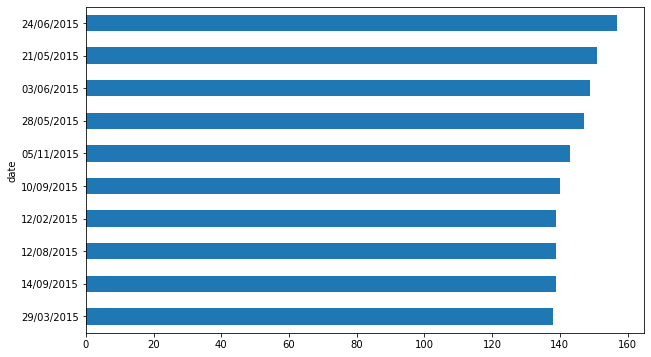

In [44]:
most_day_male = male_data.groupby(["date"])["client_id"].aggregate('count').sort_values().tail(10)
most_day_male.plot(kind='barh', figsize=(10,6))

<AxesSubplot:ylabel='time'>

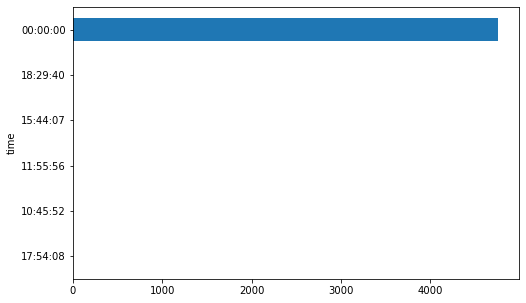

In [45]:
most_time_fem = fem_data.groupby(["time"])["client_id"].aggregate('count').sort_values().tail(6)
most_time_fem.plot(kind='barh', figsize=(8,5))

In [46]:
male_time_client_id=male_data[['client_id','time']]
male_time_client_id.groupby(['time'])['client_id'].aggregate('count').reset_index().sort_values('client_id', ascending=False).head(10)

,time,client_id
0,00:00:00,5910
16809,14:44:47,7
8821,10:34:09,6
11504,12:01:13,6
15057,13:50:37,6
15897,14:16:40,6
22168,17:32:27,5
14376,13:29:02,5
16271,14:27:54,5
16315,14:29:24,5


<AxesSubplot:ylabel='time'>

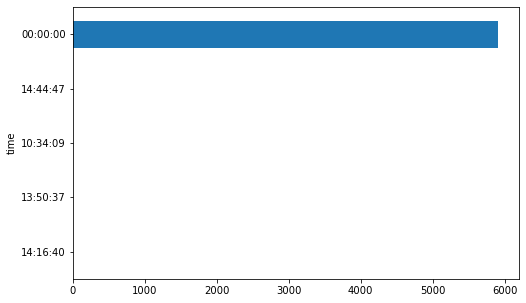

In [47]:
most_time_male = male_data.groupby(["time"])["client_id"].aggregate('count').sort_values().tail(5)
most_time_male.plot(kind='barh', figsize=(8,5))

In [48]:
fem_code=fem_data[['client_id','code']]
fem = pd.merge(codes, fem_code, on = 'code')
fem.groupby(['code_description'])['client_id'].aggregate('count').reset_index().sort_values('client_id', ascending=False)

,code_description,client_id
140,Финансовые институты — снятие наличности автом...,9916
35,"Звонки с использованием телефонов, считывающих...",7429
12,"Бакалейные магазины, супермаркеты",6801
141,Финансовые институты — снятие наличности вручную,6736
27,Денежные переводы,4403
...,...,...
127,Товары длительного пользования — нигде более н...,1
33,"Драгоценные камни и металлы, часы и ювелирные ...",1
46,"Колледжи, университеты, профессиональные школы...",1
87,"Офисное, фотографическое, фотокопировальное, и...",1


<AxesSubplot:ylabel='code_description'>

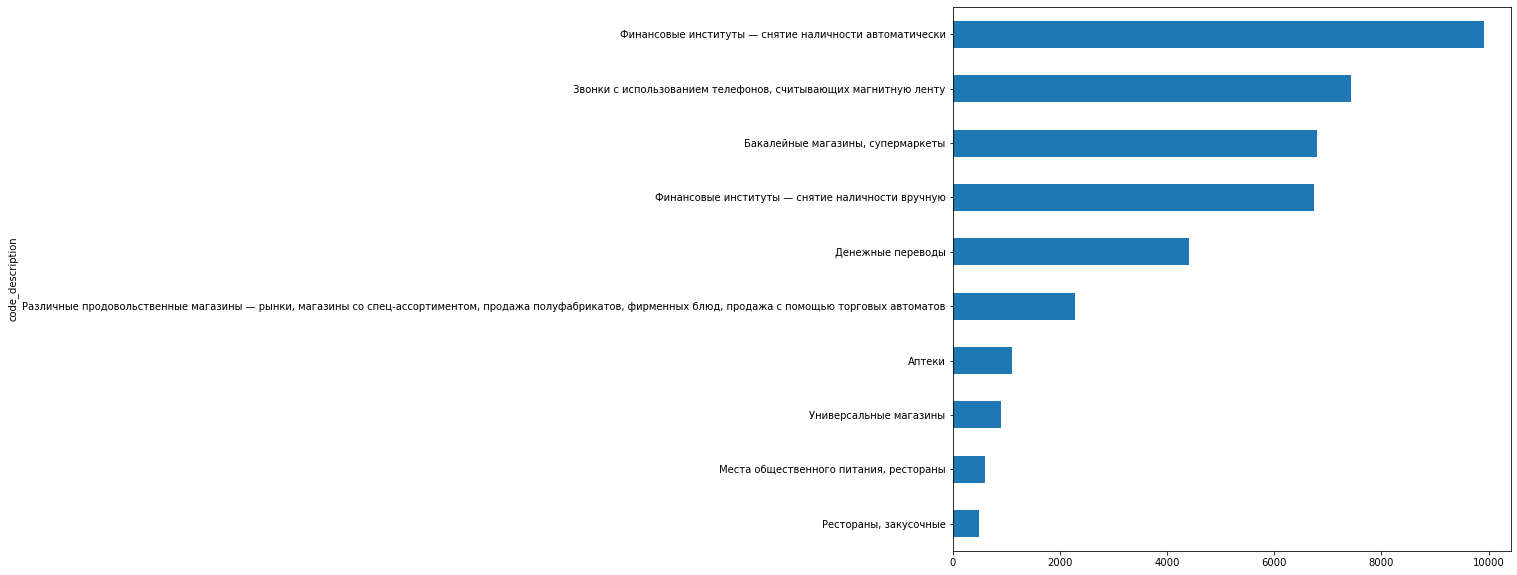

In [49]:
most_code_fem = fem.groupby(["code_description"])["client_id"].aggregate('count').sort_values().tail(10)
most_code_fem.plot(kind='barh', figsize=(10,10))

In [50]:
male_code=male_data[['client_id','code']]
male = pd.merge(codes, male_code, on = 'code')
male.groupby(['code_description'])['client_id'].aggregate('count').reset_index().sort_values('client_id', ascending=False)

,code_description,client_id
147,Финансовые институты — снятие наличности автом...,9622
148,Финансовые институты — снятие наличности вручную,7357
11,"Бакалейные магазины, супермаркеты",6202
34,"Звонки с использованием телефонов, считывающих...",5615
27,Денежные переводы,3731
...,...,...
95,Почтовые услуги — только правительство,1
20,Ветеринарные услуги,1
124,Сервисы по покупке/продаже,1
38,Информационные провайдеры,1


<AxesSubplot:ylabel='code_description'>

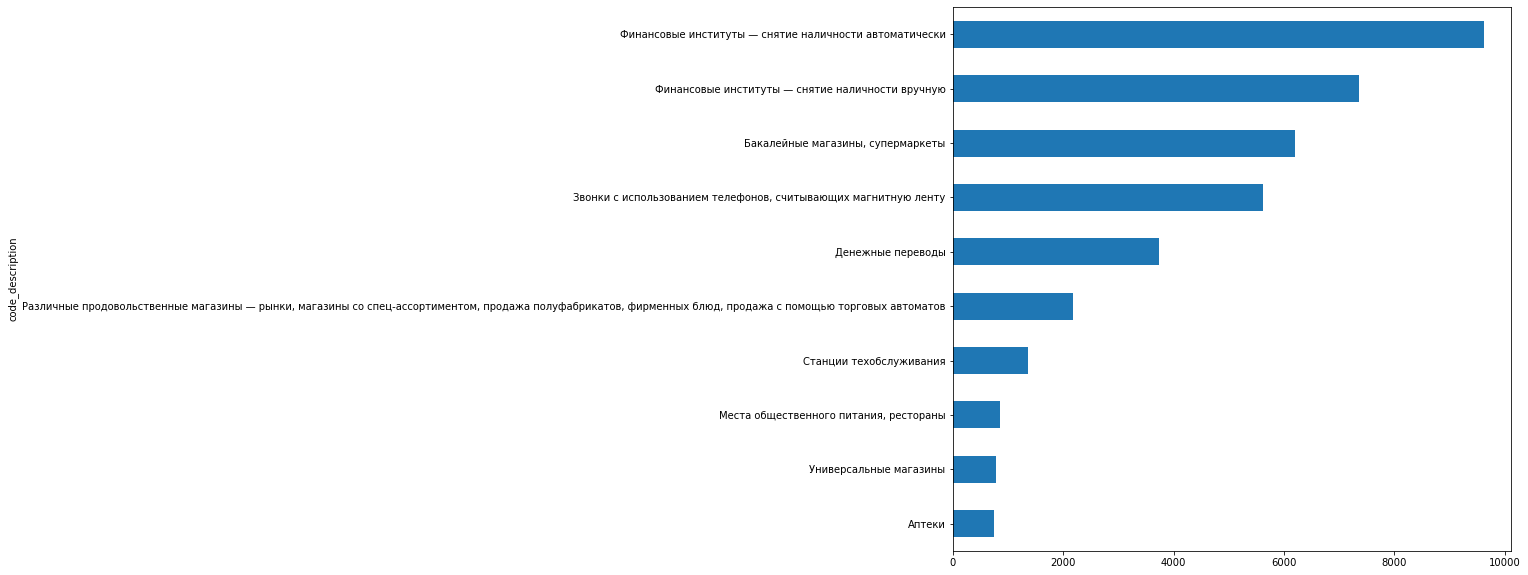

In [51]:
most_code_male = male.groupby(["code_description"])["client_id"].aggregate('count').sort_values().tail(10)
most_code_male.plot(kind='barh', figsize=(10,10))

In [52]:
male_type=male_data[['client_id','type']]
male_t = pd.merge(types, male_type, on = 'type')
male_t.groupby(['type_description'])['client_id'].aggregate('count').reset_index().sort_values('client_id', ascending=False).head(10)

,type_description,client_id
12,Выдача наличных в АТМ,6947
40,Покупка. POS,6407
19,Оплата услуги. Банкоматы,5515
22,Перевод на карту (с карты) через Мобильный бан...,5052
43,Списание с карты на карту по операции <перевод...,2160
6,Взнос наличных через АТМ (в своем тер.банке),1659
20,Перевод на карту (с карты) через АТМ (в предел...,1004
23,Перевод на карту (с карты) через Мобильный бан...,836
42,Покупка. Зарубеж.,734
44,Списание с карты на карту по операции <перевод...,446


<AxesSubplot:ylabel='type_description'>

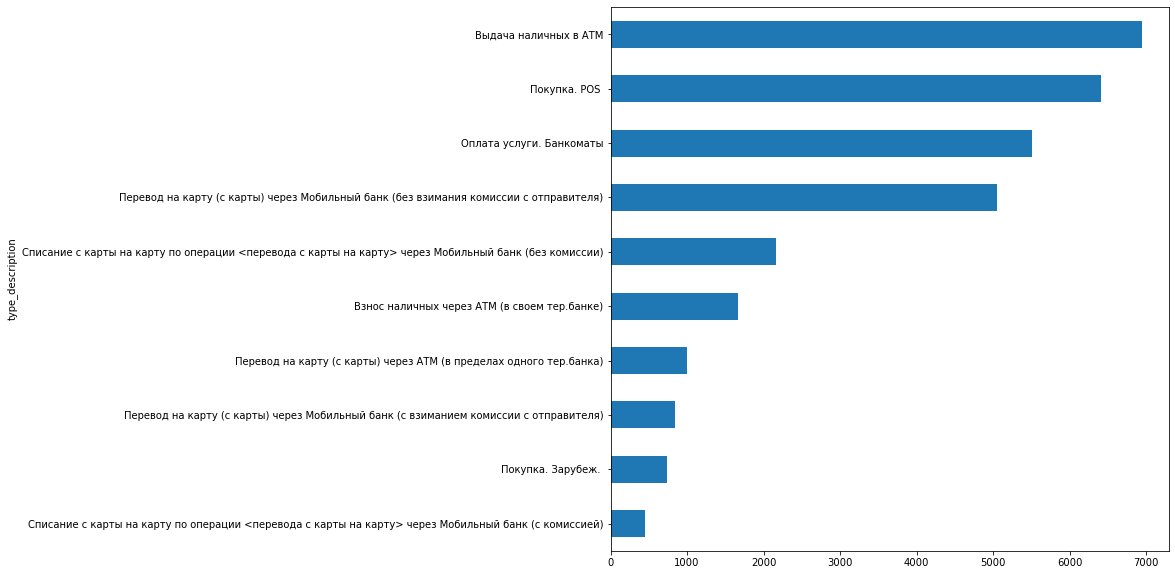

In [53]:
most_type_male = male_t.groupby(["type_description"])["client_id"].aggregate('count').sort_values().tail(10)
most_type_male.plot(kind='barh', figsize=(10,10))

In [54]:
fem_type=fem_data[['client_id','type']]
fem_t = pd.merge(types, fem_type, on = 'type')
fem_t.groupby(['type_description'])['client_id'].aggregate('count').reset_index().sort_values('client_id', ascending=False).head(10)

,type_description,client_id
18,Оплата услуги. Банкоматы,7333
12,Выдача наличных в АТМ,7188
37,Покупка. POS,5869
23,Перевод на карту (с карты) через Мобильный бан...,4756
41,Списание с карты на карту по операции <перевод...,2628
6,Взнос наличных через АТМ (в своем тер.банке),1870
21,Перевод на карту (с карты) через АТМ (в предел...,1088
44,Списание с карты по операции “перевода с карты...,520
39,Покупка. Зарубеж.,517
42,Списание с карты на карту по операции <перевод...,462


<AxesSubplot:ylabel='type_description'>

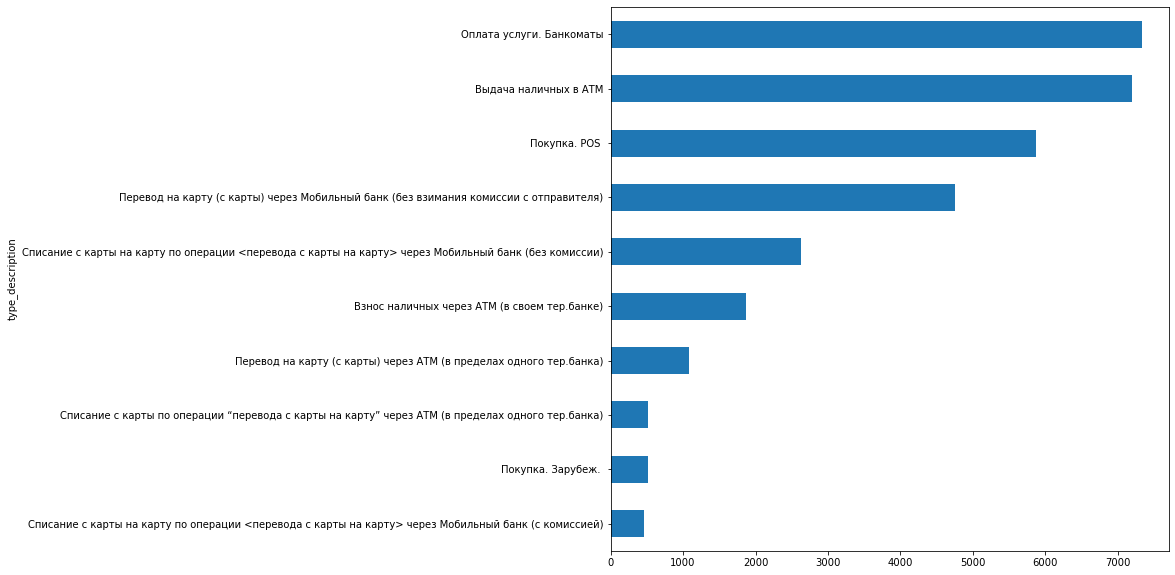

In [55]:
most_type_fem= fem_t.groupby(["type_description"])["client_id"].aggregate('count').sort_values().tail(10)
most_type_fem.plot(kind='barh', figsize=(10,10))

### IV. Unsupervised learning. 
Do the Cluster analysis. Segment the customers. K-means,
Hierarchical Clustering. With different metrics, linkages. Visualize the clusters etc.
Look for the optimal number of the clusters

In [56]:
fem_data

,client_id,datetime,code,type,sum,num,time,date,is_exists_in_train,target
0,96372458,2015-10-09 06:33:15,6011,2010,-561478.94,421,06:33:15,09/10/2015,True,0
1,96372458,2015-05-11 06:16:18,6011,7010,224591.58,270,06:16:18,11/05/2015,True,0
2,96372458,2014-12-21 05:34:06,6010,7030,224591.58,129,05:34:06,21/12/2014,True,0
3,96372458,2015-10-21 06:45:32,6011,2010,-112295.79,433,06:45:32,21/10/2015,True,0
4,96372458,2015-06-05 08:16:07,4814,1030,-11229.58,295,08:16:07,05/06/2015,True,0
...,...,...,...,...,...,...,...,...,...,...
91818,44130839,2014-09-27 11:28:18,6011,2010,-179673.26,44,11:28:18,27/09/2014,True,0
91819,43147536,2014-10-26 13:52:42,6010,7070,1122957.89,73,13:52:42,26/10/2014,True,0
91821,52382187,2015-02-27 12:33:28,6011,2010,-224591.58,197,12:33:28,27/02/2015,True,0
91824,65393099,2015-07-31 19:57:03,5921,1010,-4715.75,351,19:57:03,31/07/2015,True,0


In [57]:
###RFM score for fem data
from datetime import datetime
fem_data["datetime"] = fem_data["datetime"].dt.date


import datetime
snapshot_date = max(fem_data.datetime) + datetime.timedelta(days=1)


clients = fem_data.groupby(['client_id']).agg({
    'datetime': lambda x: (snapshot_date - x.max()).days,
    'num': 'count',
    'sum': 'sum'})


clients.rename(columns = {'datetime': 'Recency',
                            'num': 'Frequency',
                            'sum': 'MonetaryValue'}, inplace=True)

C:\Users\F497~1\AppData\Local\Temp/ipykernel_17988/4193973972.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fem_data["datetime"] = fem_data["datetime"].dt.date


In [58]:
clients

,Recency,Frequency,MonetaryValue
client_id,,,
28753,24,13,-2589800.29
38084,28,26,693495.66
50940,18,3,-16509.72
53395,10,1,44918.32
70680,26,10,936097.68
...,...,...,...
99876778,65,22,-504212.62
99882949,64,5,-256798.00
99900908,146,5,-72052.13


In [59]:
clients['MonetaryValue']=clients['MonetaryValue'].abs()

In [60]:
clients

,Recency,Frequency,MonetaryValue
client_id,,,
28753,24,13,2589800.29
38084,28,26,693495.66
50940,18,3,16509.72
53395,10,1,44918.32
70680,26,10,936097.68
...,...,...,...
99876778,65,22,504212.62
99882949,64,5,256798.00
99900908,146,5,72052.13


In [61]:
from scipy import stats
clients_fix = pd.DataFrame()
clients_fix["Recency"] = stats.boxcox(clients['Recency'])[0]
clients_fix["Frequency"] = stats.boxcox(clients['Frequency'])[0]
clients_fix["MonetaryValue"] = pd.Series(np.cbrt(clients['MonetaryValue'])).values
clients_fix.tail()

,Recency,Frequency,MonetaryValue
3335,4.992290,3.528130,79.592333
3336,4.970351,1.722976,63.561950
3337,6.177593,1.722976,41.611714
3338,0.713552,2.762454,87.398355
3339,7.753550,0.000000,60.785196


In [62]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(clients_fix)
clients_normal = scaler.transform(clients_fix)

print(clients_normal.mean(axis = 0).round(2))
print(clients_normal.std(axis = 0).round(2))

[-0.  0. -0.]
[1. 1. 1.]


In [63]:
print(clients_normal)

[[-0.08804008  0.35781671  2.36705322]
 [ 0.02402983  1.13434689  0.83782608]
 [-0.29337861 -1.14358539 -1.13749108]
 ...
 [ 1.31942097 -0.64134113 -0.63157924]
 [-1.70940877  0.27101468  0.80285766]
 [ 2.19300633 -2.15360713 -0.03089857]]


In [64]:
df = pd.DataFrame(clients_normal, columns = ['0','1','2'])
df

,0,1,2
0,-0.088040,0.357817,2.367053
1,0.024030,1.134347,0.837826
2,-0.293379,-1.143585,-1.137491
3,-0.697928,-2.153607,-0.821566
4,-0.030027,0.075456,1.129444
...,...,...,...
3335,0.662383,0.943052,0.558305
3336,0.650222,-0.641341,0.056094
3337,1.319421,-0.641341,-0.631579
3338,-1.709409,0.271015,0.802858


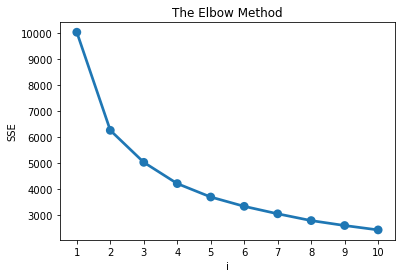

In [65]:
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
sse = {}
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(clients_normal)
    sse[i] = kmeans.inertia_
plt.title('The Elbow Method')
plt.xlabel('i')
plt.ylabel('SSE')
sns.pointplot(x=list(sse.keys()), y=list(sse.values()))
plt.show()

In [66]:
model = KMeans(n_clusters=3, random_state=42)
model.fit(clients_normal)
model.labels_.shape

(3340,)

In [67]:
clients["cluster"] = model.labels_
clients.groupby('cluster').agg({
    'Recency':'mean',
    'Frequency':'mean',
    'MonetaryValue':['mean', 'count']}).round(2)

Recency Frequency MonetaryValue      
           mean      mean          mean count
cluster                                      
0         22.86     30.24    1969533.82   596
1        122.10      4.75     179564.57  1181
2         19.20     14.77     209597.94  1563

C:\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Attribute', ylabel='Value'>

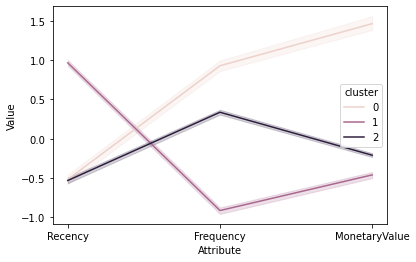

In [68]:
###Clustorasation for females
df_cluster = pd.DataFrame(clients_normal, columns=['Recency', 'Frequency', 'MonetaryValue'])
df_cluster['id'] = clients.index
df_cluster['cluster'] = model.labels_

df_cluster_melt = pd.melt(df_cluster.reset_index(),
                      id_vars=['id', 'cluster'],
                      value_vars=['Recency','Frequency','MonetaryValue'],
                      var_name='Attribute',
                      value_name='Value')
df_cluster_melt.head()

sns.lineplot('Attribute', 'Value', hue='cluster', data=df_cluster_melt)

In [69]:
###RFM score for male data
male_data["datetime"] = male_data["datetime"].dt.date


import datetime
snapshot_date2 = max(male_data.datetime) + datetime.timedelta(days=1)


clients2= male_data.groupby(['client_id']).agg({
    'datetime': lambda x: (snapshot_date2 - x.max()).days,
    'num': 'count',
    'sum': 'sum'})


clients2.rename(columns = {'datetime': 'Recency',
                            'num': 'Frequency',
                            'sum': 'MonetaryValue'}, inplace=True)

C:\Users\F497~1\AppData\Local\Temp/ipykernel_17988/3333692009.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  male_data["datetime"] = male_data["datetime"].dt.date


In [70]:
clients2

,Recency,Frequency,MonetaryValue
client_id,,,
22899,16,9,50847.54
27914,165,4,74115.21
49793,18,21,-1382413.97
52926,12,16,-17482.22
104032,379,2,-7860.70
...,...,...,...
99770777,72,6,-151264.67
99849205,48,2,22908.34
99888537,81,3,-134754.96


In [71]:
clients2['MonetaryValue']=clients2['MonetaryValue'].abs()

In [72]:
clients2

,Recency,Frequency,MonetaryValue
client_id,,,
22899,16,9,50847.54
27914,165,4,74115.21
49793,18,21,1382413.97
52926,12,16,17482.22
104032,379,2,7860.70
...,...,...,...
99770777,72,6,151264.67
99849205,48,2,22908.34
99888537,81,3,134754.96


In [73]:
clients2_fix = pd.DataFrame()
clients2_fix["Recency"] = stats.boxcox(clients2['Recency'])[0]
clients2_fix["Frequency"] = stats.boxcox(clients2['Frequency'])[0]
clients2_fix["MonetaryValue"] = pd.Series(np.cbrt(clients2['MonetaryValue'])).values
clients2_fix.tail()

,Recency,Frequency,MonetaryValue
2655,5.047855,1.973665,53.281834
2656,4.496342,0.719309,28.400841
2657,5.211254,1.165299,51.268222
2658,5.825839,0.000000,69.581680
2659,5.228360,1.493590,82.894488


In [74]:
scaler2 = StandardScaler()

scaler2.fit(clients2_fix)
clients2_normal = scaler2.transform(clients2_fix)

print(clients2_normal.mean(axis = 0).round(2))
print(clients2_normal.std(axis = 0).round(2))

[-0.  0. -0.]
[1. 1. 1.]


In [75]:
print(clients2_normal)

[[-0.32167057 -0.17267605 -0.93086897]
 [ 1.47519663 -0.93813144 -0.80122434]
 [-0.23835371  0.7007824   1.01337411]
 ...
 [ 0.89337638 -1.19421718 -0.55899987]
 [ 1.24443995 -2.10321555 -0.08011298]
 [ 0.90314758 -0.93813144  0.26800965]]


In [76]:
df2 = pd.DataFrame(clients2_normal, columns = ['0','1','2'])
df2

,0,1,2
0,-0.321671,-0.172676,-0.930869
1,1.475197,-0.938131,-0.801224
2,-0.238354,0.700782,1.013374
3,-0.522082,0.411839,-1.220961
4,2.196045,-1.542114,-1.379700
...,...,...,...
2655,0.800040,-0.563646,-0.506345
2656,0.485004,-1.542114,-1.156969
2657,0.893376,-1.194217,-0.559000
2658,1.244440,-2.103216,-0.080113


C:\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=11.
  warnings.warn(


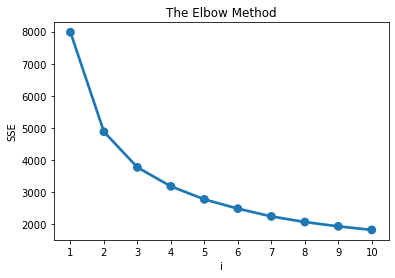

In [77]:
sse2 = {}
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(clients2_normal)
    sse2[i] = kmeans.inertia_
plt.title('The Elbow Method')
plt.xlabel('i')
plt.ylabel('SSE')
sns.pointplot(x=list(sse2.keys()), y=list(sse2.values()))
plt.show()

In [78]:
model2 = KMeans(n_clusters=3, random_state=42)
model2.fit(clients2_normal)
model2.labels_.shape

(2660,)

In [79]:
clients2["cluster"] = model2.labels_
clients2.groupby('cluster').agg({
    'Recency':'mean',
    'Frequency':'mean',
    'MonetaryValue':['mean', 'count']}).round(2)

Recency Frequency MonetaryValue      
           mean      mean          mean count
cluster                                      
0         18.88     39.11    3168273.90   429
1        114.83      4.99     268928.67   942
2         18.95     18.33     359866.28  1289

C:\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Attribute', ylabel='Value'>

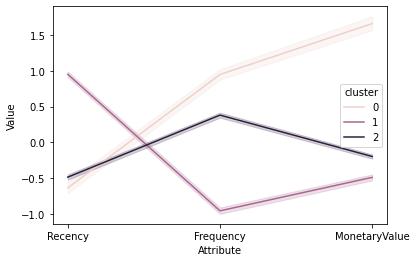

In [80]:
###Clustorasation for males
df_cluster2 = pd.DataFrame(clients2_normal, columns=['Recency', 'Frequency', 'MonetaryValue'])
df_cluster2['id'] = clients2.index
df_cluster2['cluster'] = model2.labels_

df_cluster2_melt = pd.melt(df_cluster2.reset_index(),
                      id_vars=['id', 'cluster'],
                      value_vars=['Recency','Frequency','MonetaryValue'],
                      var_name='Attribute',
                      value_name='Value')
df_cluster2_melt.head()

sns.lineplot('Attribute', 'Value', hue='cluster', data=df_cluster2_melt)

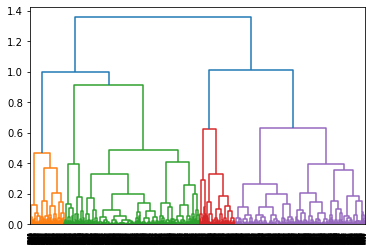

In [81]:
### Hierarchical clustering female data
import scipy.cluster.hierarchy as model
dend_max = model.dendrogram(model.linkage(clients_normal, method='average',metric='cosine'))

### V. Analyzing the results.

### VI. Conclusion.